<a href="https://colab.research.google.com/github/Raju-24-25/Model-Building-Handsons/blob/main/Decision_Tree_Handson_Based_On_Real_Data_(Heart_Attack).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step - I ->
Import the Necessery Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Link : https://drive.google.com/file/d/1C9AuqmgFeh6V67At3347Qspi4BrHU2cJ/view?usp=sharing

# Loading The Dataset File -

In [2]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


 age = It is the age of patient

 sex = It is Gender of the patient ( 0 for female , 1 for male )

 cp = Chest pain of patient ( 1 level , 2 level )

 trestbps = Blood pressure in resting condition

 chol = cholesterol level at admission at hospital

 fbs = Fasting blood sugar level

 restecg = ECG ( Electrocardio graphy ) level at resting

 thalach = Maximm heart rate achieved during the test

 exang =  Exercise Induced angina  ( Facing any discomfor or not)

 oldpeak = How much ECG changes dusring exercise as compared to rest

 slope = Slope of ECG or ST changes

 ca ( coronary artery ) = The number of major blood vessels ( 0-3)  colored by fluoroscopy

 thal ( thalassemia) = A blood disorder that can damage your heart

 target = whether a patient is having heart disease or not , 1 for Yes , 0 for No

# Step - III

EDA - Exploratory Data Analysis

In [3]:
df.shape

(303, 14)

 Check in target column how many people are having Heart disease and how many are not having.

 Total 303 patient

 1 means Yes heart disease

 0 means No heart disease

In [4]:
df['target'].value_counts()  # value_counts() can return count of unique values

,count
target,
1,165
0,138


In [5]:
df.info()    # report of all columns and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Step - IV ( Data Cleaning ) -

* Check For Null Values
* Check For Duplicate Values
* Check For Outliers


In [6]:
# Checking for Null Values

df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# Check For Duplicate Values

df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# check For Outliers

col = list(df.columns)

In [11]:
col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

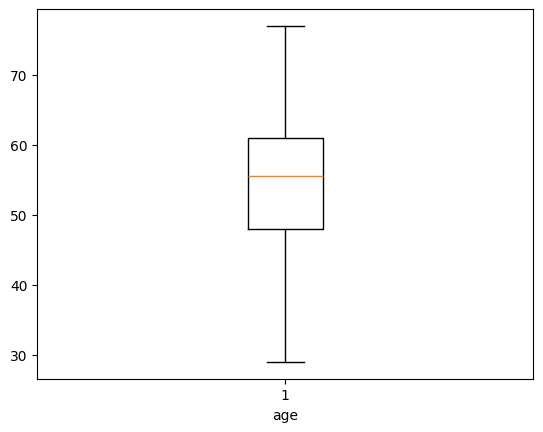

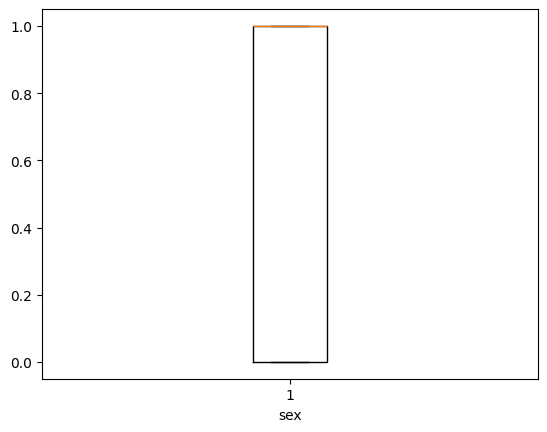

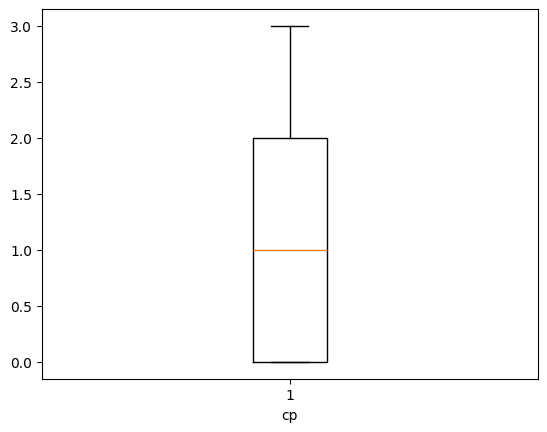

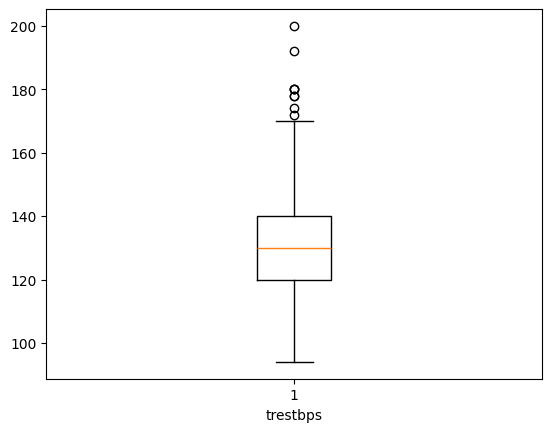

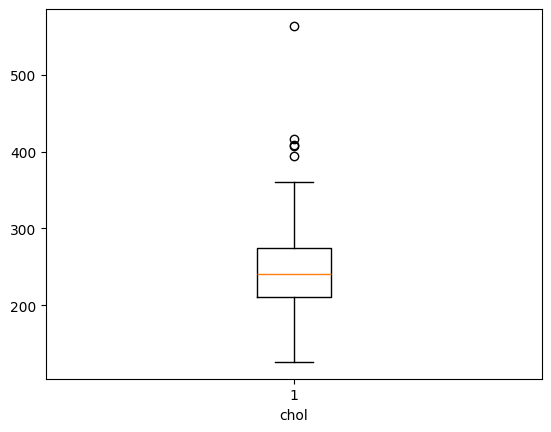

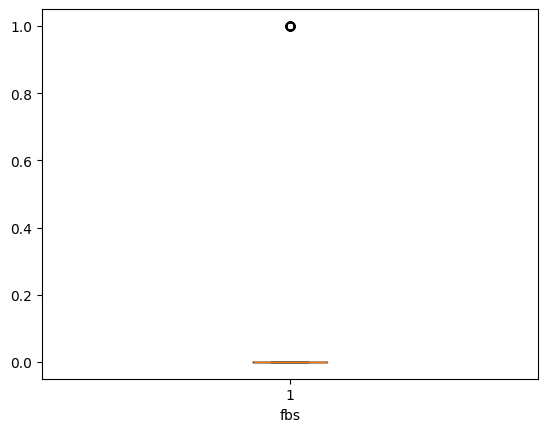

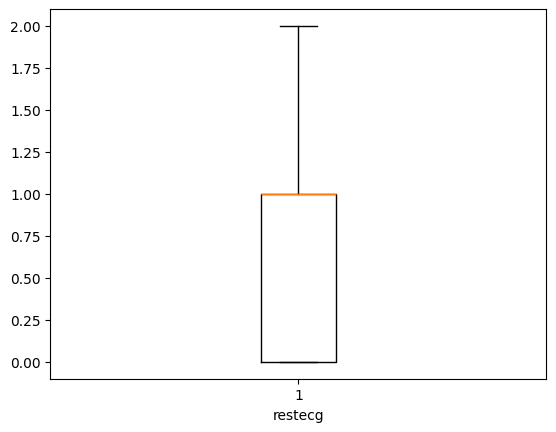

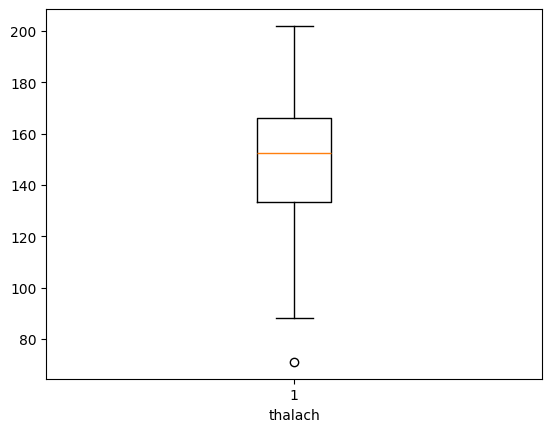

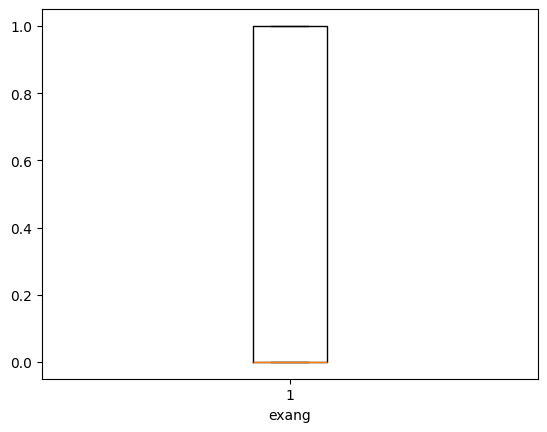

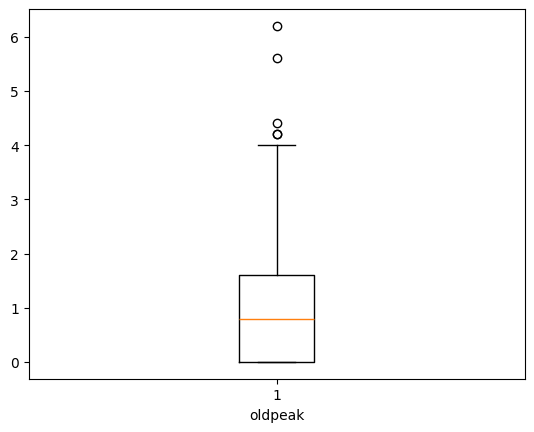

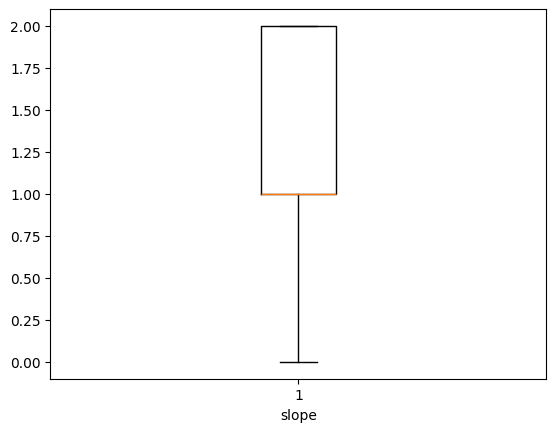

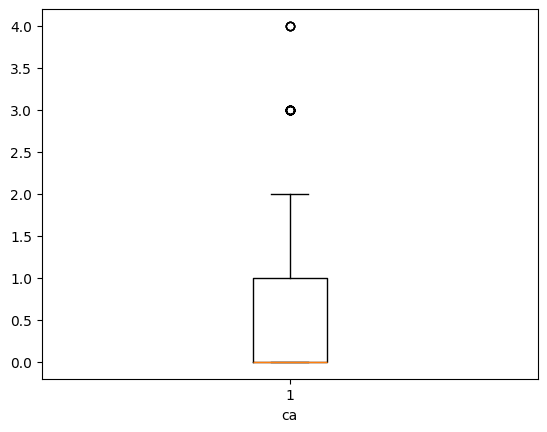

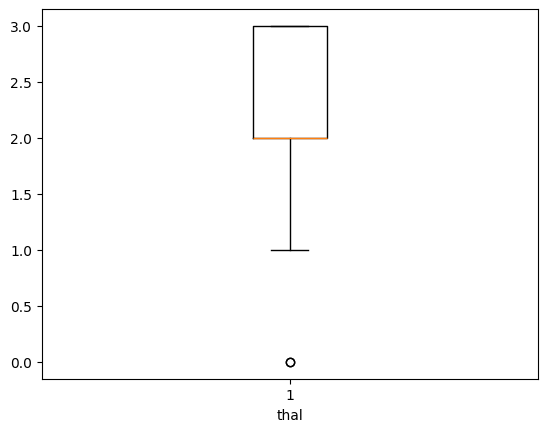

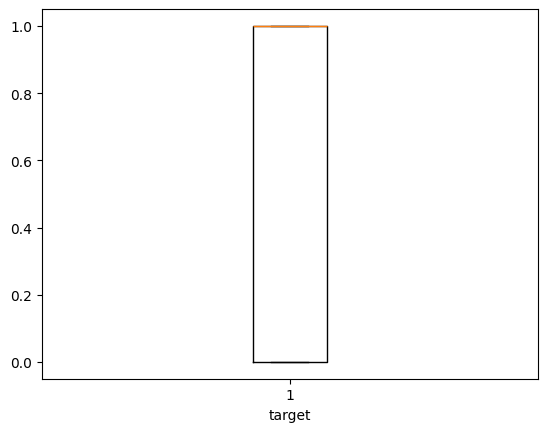

In [12]:
# Plotting Box Plot To Find Outliers

for i in col:
  if(df[i].dtypes != 'object'):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

# As Decision Tree Algorithm Does Not hHave Much Impact Of Outliers, So We Can Skip The Outlier Removal Part

<Axes: >

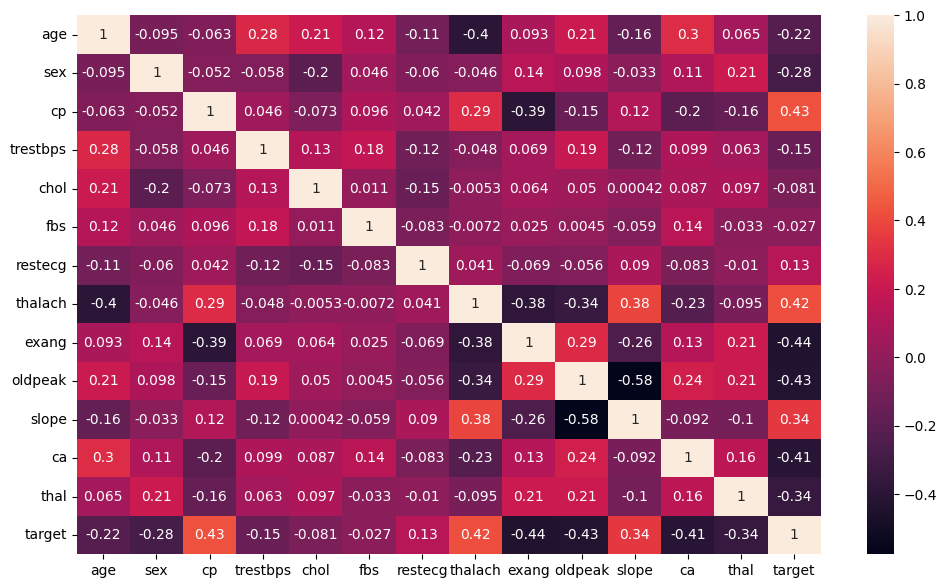

In [13]:
# This Step Is optional

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot = True)

 Step - V ( Model Building )

In [14]:
from sklearn.model_selection import train_test_split   # splitting the dataset into train and test
from sklearn.metrics import accuracy_score, confusion_matrix     # To evaluate model performance
from sklearn.tree import DecisionTreeClassifier   # Load the model library

In [15]:
x = df.drop(columns=['target'])
y = df['target']

In [16]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [19]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [20]:
y_train

,target
116,1
189,0
247,0
7,1
45,1
...,...
252,0
193,0
117,1
47,1


In [21]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3


In [22]:
y_test

,target
226,0
152,1
229,0
202,0
52,1
246,0
176,0
169,0
224,0
218,0


In [23]:
model = DecisionTreeClassifier()  # Model of decision tree

In [24]:
# Train the model

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
# Test out model

y_pred = model.predict(x_test)

In [26]:
y_pred   # Answer given by my model

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1])

In [27]:
# Check the accuracy of model by comparing y_pred with y_test

accuracy_score(y_pred, y_test)

0.782608695652174

In [28]:
# Confusion matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[19,  6],
       [ 4, 17]])

[Text(0.5798611111111112, 0.95, 'x[11] <= 0.5\ngini = 0.495\nsamples = 256\nvalue = [115, 141]'),
 Text(0.39305555555555555, 0.85, 'x[12] <= 2.5\ngini = 0.368\nsamples = 152\nvalue = [37, 115]'),
 Text(0.4864583333333333, 0.8999999999999999, 'True  '),
 Text(0.275, 0.75, 'x[9] <= 2.7\ngini = 0.22\nsamples = 111\nvalue = [14.0, 97.0]'),
 Text(0.19444444444444445, 0.65, 'x[7] <= 83.5\ngini = 0.172\nsamples = 105\nvalue = [10, 95]'),
 Text(0.17222222222222222, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21666666666666667, 0.55, 'x[4] <= 272.0\ngini = 0.158\nsamples = 104\nvalue = [9, 95]'),
 Text(0.12222222222222222, 0.45, 'x[8] <= 0.5\ngini = 0.092\nsamples = 83\nvalue = [4, 79]'),
 Text(0.06666666666666667, 0.35, 'x[3] <= 109.0\ngini = 0.028\nsamples = 70\nvalue = [1, 69]'),
 Text(0.044444444444444446, 0.25, 'x[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.022222222222222223, 0.15, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.06666666666666667, 0.1

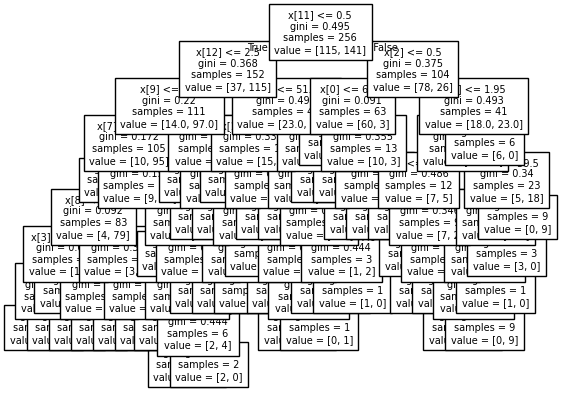

In [29]:
from sklearn import tree
tree.plot_tree(model, fontsize=7)

In [30]:
model.get_depth()

9

**Testing different different max depth to increase accuracy**

In [31]:
depths = [1,2,3,4,5,6,7,8,9,10]
for i in depths:
  model = DecisionTreeClassifier(max_depth = i, criterion = 'gini', random_state = 0)
  model.fit(x_train, y_train)
  y_predict = model.predict(x_test)
  acc = accuracy_score(y_predict, y_test)
  print(f"Max Depth : {i} and Accuracy Score : {acc}")

Max Depth : 1 and Accuracy Score : 0.6521739130434783
Max Depth : 2 and Accuracy Score : 0.8260869565217391
Max Depth : 3 and Accuracy Score : 0.782608695652174
Max Depth : 4 and Accuracy Score : 0.8695652173913043
Max Depth : 5 and Accuracy Score : 0.8478260869565217
Max Depth : 6 and Accuracy Score : 0.8043478260869565
Max Depth : 7 and Accuracy Score : 0.8043478260869565
Max Depth : 8 and Accuracy Score : 0.782608695652174
Max Depth : 9 and Accuracy Score : 0.782608695652174
Max Depth : 10 and Accuracy Score : 0.782608695652174


In [32]:
depths = [1,2,3,4,5,6,7,8,9,10]
for i in depths:
  model = DecisionTreeClassifier(max_depth = i, criterion = 'entropy', random_state = 0)
  model.fit(x_train, y_train)
  y_predict = model.predict(x_test)
  acc = accuracy_score(y_predict, y_test)
  print(f"Max Depth : {i} and Accuracy Score : {acc}")

Max Depth : 1 and Accuracy Score : 0.6521739130434783
Max Depth : 2 and Accuracy Score : 0.8260869565217391
Max Depth : 3 and Accuracy Score : 0.782608695652174
Max Depth : 4 and Accuracy Score : 0.8695652173913043
Max Depth : 5 and Accuracy Score : 0.7608695652173914
Max Depth : 6 and Accuracy Score : 0.8478260869565217
Max Depth : 7 and Accuracy Score : 0.8043478260869565
Max Depth : 8 and Accuracy Score : 0.7608695652173914
Max Depth : 9 and Accuracy Score : 0.8260869565217391
Max Depth : 10 and Accuracy Score : 0.8260869565217391


**Applying Hyper-parameter tuning to try all possible combinations of parameter to get best accuracy.**

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
new_model = DecisionTreeClassifier()

In [35]:
grid_params ={  "criterion":["gini" , "entropy"] , 'max_depth':[1,5,8,10,12,15,20,45,56,100]  ,  'random_state' :[0,10,20,42,60,66,100,200]
              , 'min_samples_split':[2,6,3,4,5,66,7,8] , 'min_samples_leaf' :[1,4,4,5,6,88,99]}

# criterion = Decides how to split the tree
# max_depth = Hoe deep the tree can go
# min_samples_split = Minimum data points needed to split a node
# min_sample_leaf = Minimum data points required in a leaf

In [36]:
gv = GridSearchCV(estimator=new_model , param_grid = grid_params , cv= 3 )

# cv means cross validation , It means your data will be splitted into 3 parts and model will be trained and evaluated 3 times

In [37]:
gv.fit(x_train , y_train)  # Training my model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 8, 10, 12, 15, 20, 45, 56, 100],
                         'min_samples_leaf': [1, 4, 4, 5, 6, 88, 99],
                         'min_samples_split': [2, 6, 3, 4, 5, 66, 7, 8],
                         'random_state': [0, 10, 20, 42, 60, 66, 100, 200]})

In [38]:
gv.best_params_  # Return best parameters for your model that can give best accuracy

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 66,
 'random_state': 0}

In [39]:
# New final model i am building with best hyper parameters

dt_model =gv.best_estimator_  # Create model with these best paramater and so our model can give best accuracy

In [40]:
y_pred_1 = dt_model.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred_1)   # Check the accuracy score of model in whic we applied Hyper parameter tuning

0.8260869565217391

**Now our final model is giving us a accuracy score of more than 80%**

In [42]:
from sklearn import tree

[Text(0.6, 0.9166666666666666, 'x[11] <= 0.5\ngini = 0.495\nsamples = 256\nvalue = [115, 141]'),
 Text(0.4, 0.75, 'x[12] <= 2.5\ngini = 0.368\nsamples = 152\nvalue = [37, 115]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'x[9] <= 2.7\ngini = 0.22\nsamples = 111\nvalue = [14.0, 97.0]'),
 Text(0.2, 0.4166666666666667, 'x[7] <= 83.5\ngini = 0.172\nsamples = 105\nvalue = [10, 95]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.25, 'x[4] <= 272.0\ngini = 0.158\nsamples = 104\nvalue = [9, 95]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.092\nsamples = 83\nvalue = [4, 79]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.493\nsamples = 41\nvalue = [23.0, 18.0]'),
 Text(0.8, 0.75, 'x[2] <= 0.5\ngini = 0.375\nsamples = 104\nvalue = [78, 26]'),
 Text(0.7, 0.8333333333333333, '  False'),
 

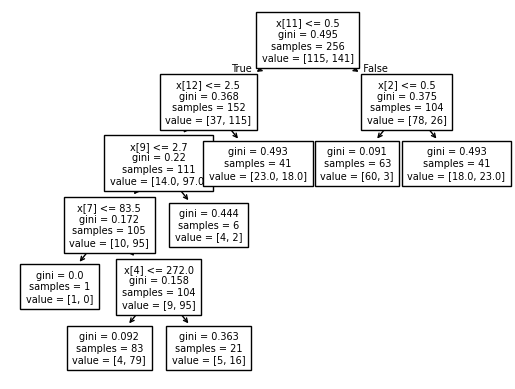

In [43]:
tree.plot_tree(dt_model,fontsize=7)